# Lung & Colon Cancer Classification

## Project Overview

Proyek ini bertujuan untuk mengembangkan sistem klasifikasi kanker paru-paru dan kolon menggunakan model deep learning, terutama Convolutional Neural Network (CNN), ResNet, dan EfficientNet. Dataset yang berisi citra medis seperti gambar X-ray paru-paru dan gambar kolon dikumpulkan, diproses, dan digunakan untuk melatih model-model CNN tersebut. Dengan menggunakan model-model tersebut, proyek ini bertujuan untuk mengklasifikasikan gambar-gambar medis sebagai kanker paru-paru positif atau negatif, serta kanker kolon positif atau negatif. Sistem ini diharapkan dapat membantu dalam deteksi dini kanker paru-paru dan kolon, sehingga memungkinkan penanganan dan pengobatan yang lebih efektif.

Dataset ini berisi 25.000 gambar histopatologi dengan 5 kelas. Semua gambar berukuran 768 x 768 piksel dan dalam format file jpeg.
Gambar dihasilkan dari sampel asli dari sumber yang memenuhi dan divalidasi HIPAA, terdiri dari 750 total gambar jaringan paru-paru (250 jaringan paru jinak, 250 adenokarsinoma paru, dan 250 karsinoma sel skuamosa paru) dan 500 total gambar jaringan usus besar (250 jinak jaringan usus besar dan 250 adenokarsinoma usus besar) dan ditambah menjadi 25.000 menggunakan paket Augmentor.
Ada lima kelas dalam kumpulan data, masing-masing dengan 5.000 gambar, yaitu:

* Lung benign tissue
* Lung adenocarcinoma
* Lung squamous cell carcinoma
* Colon adenocarcinoma
* Colon benign tissue

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

In [3]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.76G/1.76G [01:26<00:00, 24.7MB/s]
100% 1.76G/1.76G [01:26<00:00, 21.9MB/s]


#### Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [5]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2023-07-03 03:13:57--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-07-03 03:13:58 (110 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [6]:
unzip_data("/content/lung-and-colon-cancer-histopathological-images.zip")

### Proportion of Number of Each Class

In [7]:
walk_through_dir("/content/lung_colon_image_set")

There are 2 directories and 0 images in '/content/lung_colon_image_set'.
There are 2 directories and 0 images in '/content/lung_colon_image_set/colon_image_sets'.
There are 0 directories and 5000 images in '/content/lung_colon_image_set/colon_image_sets/colon_aca'.
There are 0 directories and 5000 images in '/content/lung_colon_image_set/colon_image_sets/colon_n'.
There are 3 directories and 0 images in '/content/lung_colon_image_set/lung_image_sets'.
There are 0 directories and 5000 images in '/content/lung_colon_image_set/lung_image_sets/lung_n'.
There are 0 directories and 5000 images in '/content/lung_colon_image_set/lung_image_sets/lung_scc'.
There are 0 directories and 5000 images in '/content/lung_colon_image_set/lung_image_sets/lung_aca'.


In [8]:
import os
from PIL import Image

def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Ekstensi file gambar yang akan dihitung

    count = 0

    for file_name in os.listdir(folder_path):
        if any(ext in file_name.lower() for ext in image_extensions):
            file_path = os.path.join(folder_path, file_name)
            try:
                Image.open(file_path)
                count += 1
            except:
                pass  # Skip file yang tidak dapat dibuka sebagai gambar

    return count

In [9]:
Lung_benign_tissue_path = "/content/lung_colon_image_set/lung_image_sets/lung_n"
Lung_adenocarcinoma_path = "/content/lung_colon_image_set/lung_image_sets/lung_aca"
Lung_squamous_cell_carcinoma_path = "/content/lung_colon_image_set/lung_image_sets/lung_scc"
Colon_adenocarcinoma_path = "/content/lung_colon_image_set/colon_image_sets/colon_aca"
Colon_benign_tissue_path = "/content/lung_colon_image_set/colon_image_sets/colon_n"

path = [Lung_benign_tissue_path, Lung_adenocarcinoma_path, Lung_squamous_cell_carcinoma_path, Colon_adenocarcinoma_path, Colon_benign_tissue_path]
Jumlah_data = []

for x in path:
  count = count_images_in_folder(x)
  Jumlah_data.append(count)

Jumlah_data

[5000, 5000, 5000, 5000, 5000]

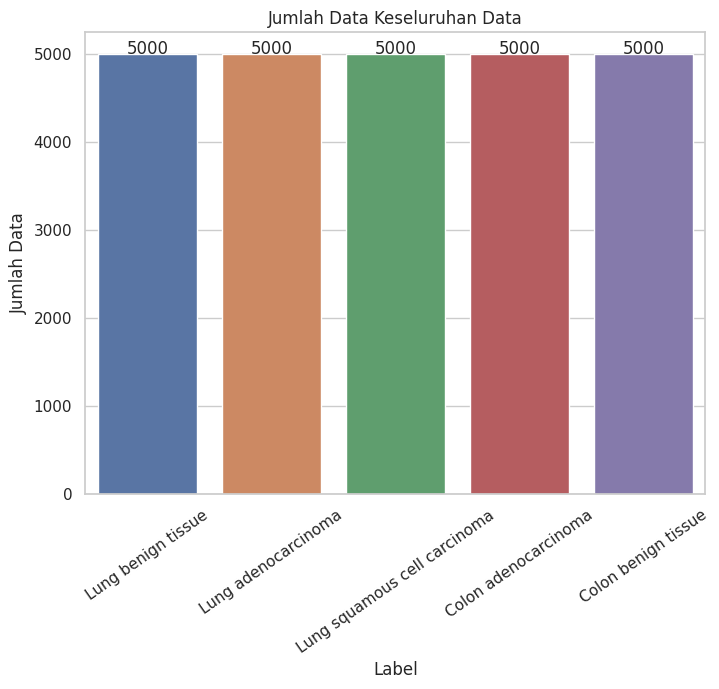

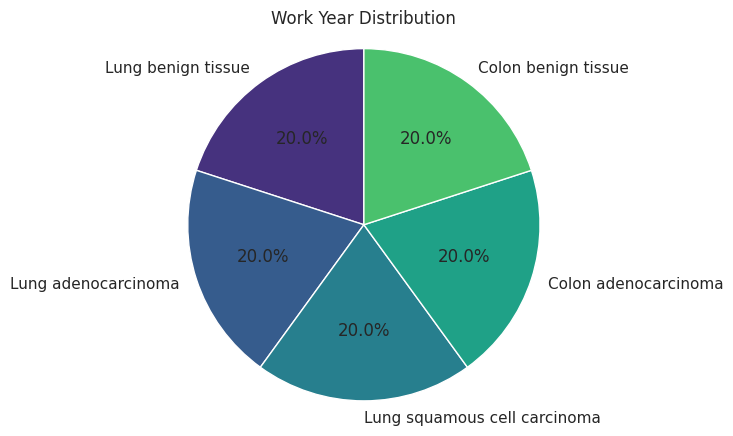

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

label = ["Lung benign tissue", "Lung adenocarcinoma", "Lung squamous cell carcinoma", "Colon adenocarcinoma", "Colon benign tissue"]

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=label, y=Jumlah_data)
plt.title('Jumlah Data Keseluruhan Data')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=35)

# Menambahkan keterangan nilai akurasi pada setiap batang
for i in range(len(Jumlah_data)):
    plt.text(i, Jumlah_data[i] + 0.01, str(Jumlah_data[i]), ha='center')

plt.figure(figsize=(5, 5))
plt.pie(Jumlah_data, labels=label, autopct='%1.1f%%',
        colors=sns.color_palette('viridis'), startangle=90)
plt.title('Work Year Distribution')
plt.axis('equal')
plt.show()


plt.show()

Distribusi Data seimbang masing masing 20%

### Visualization Image Data

In [11]:
train_dir = '/content/lung_colon_image_set/'

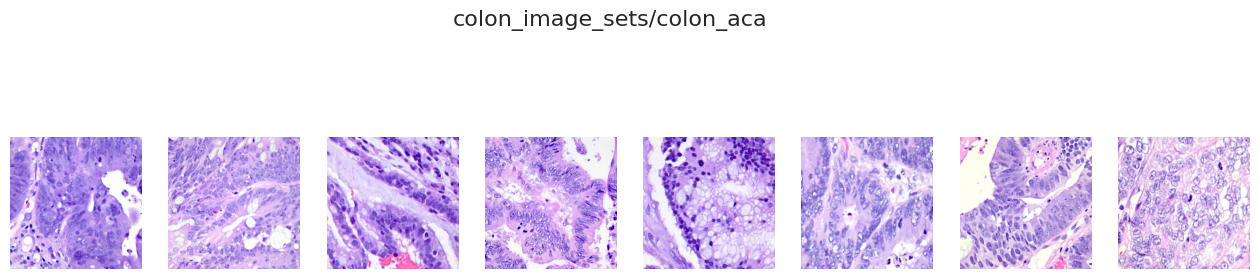

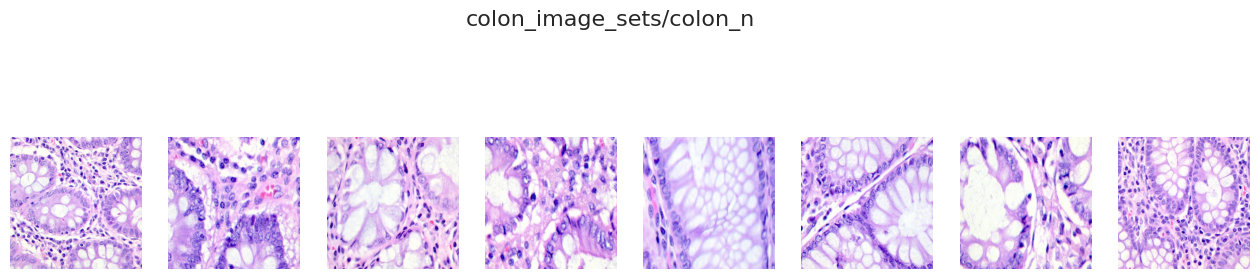

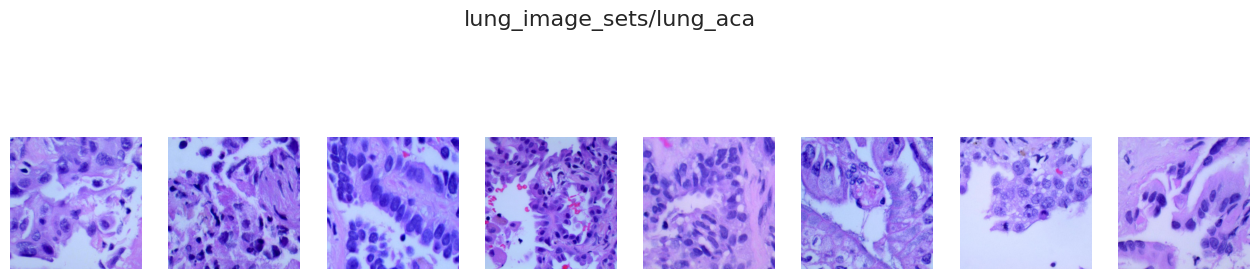

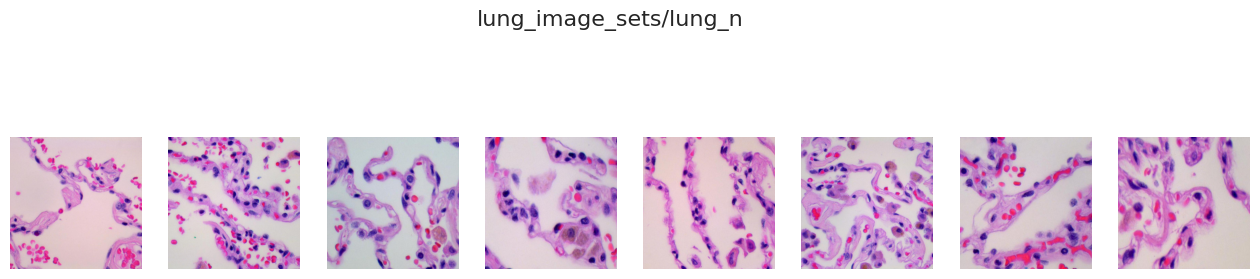

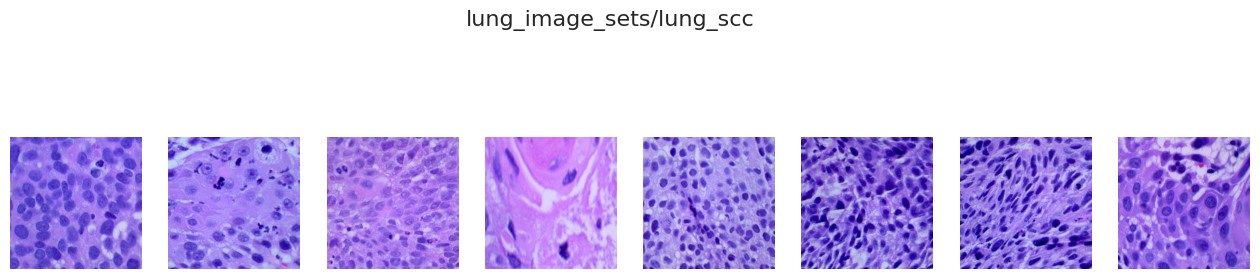

In [12]:
# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="colon_image_sets/colon_aca",
                        num_images = 8)

# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="colon_image_sets/colon_n",
                        num_images = 8)

# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="lung_image_sets/lung_aca",
                        num_images = 8)

# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="lung_image_sets/lung_n",
                        num_images = 8)

# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="lung_image_sets/lung_scc",
                        num_images = 8)

## Data Pre Processing

### SPLIT DATA

In [13]:
import os
import shutil
import random

# Path ke folder yang ingin Anda buat
folder_path = '/content/lung_colon_split'

# Membuat folder
os.makedirs(folder_path, exist_ok=True)

print("Folder berhasil dibuat!")

Folder berhasil dibuat!


#### Data Split Colon_aca

In [14]:
# Path ke folder data
data_folder = '/content/lung_colon_image_set/colon_image_sets/colon_aca'
train_folder = '/content/lung_colon_split/train_data/colon_aca'
test_folder = '/content/lung_colon_split/test_data/colon_aca'
validation_folder = '/content/lung_colon_split/validation_data/colon_aca'

# Pembagian persentase (train, test, validation)
train_percentage = 0.7
test_percentage = 0.15
validation_percentage = 0.15

# Membuat folder untuk set data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Mengambil daftar file dalam folder data
file_list = os.listdir(data_folder)

# Mengacak urutan file
random.shuffle(file_list)

# Menghitung jumlah file untuk masing-masing set data
total_files = len(file_list)
train_size = int(total_files * train_percentage)
test_size = int(total_files * test_percentage)
validation_size = total_files - train_size - test_size

# Memindahkan file ke set data masing-masing
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)

    if i < train_size:
        destination_folder = train_folder
    elif i < train_size + test_size:
        destination_folder = test_folder
    else:
        destination_folder = validation_folder

    shutil.copy(file_path, destination_folder)

print("Pembagian data selesai!")
print(f"train = {train_size}")
print(f"test = {test_size}")
print(f"validation = {validation_size}")


Pembagian data selesai!
train = 3500
test = 750
validation = 750


#### Data Split Colon_n

In [15]:
# Path ke folder data
data_folder = '/content/lung_colon_image_set/colon_image_sets/colon_n'
train_folder = '/content/lung_colon_split/train_data/colon_n'
test_folder = '/content/lung_colon_split/test_data/colon_n'
validation_folder = '/content/lung_colon_split/validation_data/colon_n'

# Pembagian persentase (train, test, validation)
train_percentage = 0.7
test_percentage = 0.15
validation_percentage = 0.15

# Membuat folder untuk set data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Mengambil daftar file dalam folder data
file_list = os.listdir(data_folder)

# Mengacak urutan file
random.shuffle(file_list)

# Menghitung jumlah file untuk masing-masing set data
total_files = len(file_list)
train_size = int(total_files * train_percentage)
test_size = int(total_files * test_percentage)
validation_size = total_files - train_size - test_size

# Memindahkan file ke set data masing-masing
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)

    if i < train_size:
        destination_folder = train_folder
    elif i < train_size + test_size:
        destination_folder = test_folder
    else:
        destination_folder = validation_folder

    shutil.copy(file_path, destination_folder)

print("Pembagian data selesai!")
print(f"train = {train_size}")
print(f"test = {test_size}")
print(f"validation = {validation_size}")

Pembagian data selesai!
train = 3500
test = 750
validation = 750


#### Data Split Lung_aca

In [16]:
# Path ke folder data
data_folder = '/content/lung_colon_image_set/lung_image_sets/lung_aca'
train_folder = '/content/lung_colon_split/train_data/lung_aca'
test_folder = '/content/lung_colon_split/test_data/lung_aca'
validation_folder = '/content/lung_colon_split/validation_data/lung_aca'

# Pembagian persentase (train, test, validation)
train_percentage = 0.7
test_percentage = 0.15
validation_percentage = 0.15

# Membuat folder untuk set data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Mengambil daftar file dalam folder data
file_list = os.listdir(data_folder)

# Mengacak urutan file
random.shuffle(file_list)

# Menghitung jumlah file untuk masing-masing set data
total_files = len(file_list)
train_size = int(total_files * train_percentage)
test_size = int(total_files * test_percentage)
validation_size = total_files - train_size - test_size

# Memindahkan file ke set data masing-masing
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)

    if i < train_size:
        destination_folder = train_folder
    elif i < train_size + test_size:
        destination_folder = test_folder
    else:
        destination_folder = validation_folder

    shutil.copy(file_path, destination_folder)

print("Pembagian data selesai!")
print(f"train = {train_size}")
print(f"test = {test_size}")
print(f"validation = {validation_size}")

Pembagian data selesai!
train = 3500
test = 750
validation = 750


#### Data Split Lung_n

In [17]:
# Path ke folder data
data_folder = '/content/lung_colon_image_set/lung_image_sets/lung_n'
train_folder = '/content/lung_colon_split/train_data/lung_n'
test_folder = '/content/lung_colon_split/test_data/lung_n'
validation_folder = '/content/lung_colon_split/validation_data/lung_n'

# Pembagian persentase (train, test, validation)
train_percentage = 0.7
test_percentage = 0.15
validation_percentage = 0.15

# Membuat folder untuk set data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Mengambil daftar file dalam folder data
file_list = os.listdir(data_folder)

# Mengacak urutan file
random.shuffle(file_list)

# Menghitung jumlah file untuk masing-masing set data
total_files = len(file_list)
train_size = int(total_files * train_percentage)
test_size = int(total_files * test_percentage)
validation_size = total_files - train_size - test_size

# Memindahkan file ke set data masing-masing
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)

    if i < train_size:
        destination_folder = train_folder
    elif i < train_size + test_size:
        destination_folder = test_folder
    else:
        destination_folder = validation_folder

    shutil.copy(file_path, destination_folder)

print("Pembagian data selesai!")
print(f"train = {train_size}")
print(f"test = {test_size}")
print(f"validation = {validation_size}")

Pembagian data selesai!
train = 3500
test = 750
validation = 750


#### Data Split Lung_scc

In [18]:
# Path ke folder data
data_folder = '/content/lung_colon_image_set/lung_image_sets/lung_scc'
train_folder = '/content/lung_colon_split/train_data/lung_scc'
test_folder = '/content/lung_colon_split/test_data/lung_scc'
validation_folder = '/content/lung_colon_split/validation_data/lung_scc'

# Pembagian persentase (train, test, validation)
train_percentage = 0.7
test_percentage = 0.15
validation_percentage = 0.15

# Membuat folder untuk set data
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Mengambil daftar file dalam folder data
file_list = os.listdir(data_folder)

# Mengacak urutan file
random.shuffle(file_list)

# Menghitung jumlah file untuk masing-masing set data
total_files = len(file_list)
train_size = int(total_files * train_percentage)
test_size = int(total_files * test_percentage)
validation_size = total_files - train_size - test_size

# Memindahkan file ke set data masing-masing
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)

    if i < train_size:
        destination_folder = train_folder
    elif i < train_size + test_size:
        destination_folder = test_folder
    else:
        destination_folder = validation_folder

    shutil.copy(file_path, destination_folder)

print("Pembagian data selesai!")
print(f"train = {train_size}")
print(f"test = {test_size}")
print(f"validation = {validation_size}")

Pembagian data selesai!
train = 3500
test = 750
validation = 750


In [19]:
walk_through_dir("/content/lung_colon_split")

There are 3 directories and 0 images in '/content/lung_colon_split'.
There are 5 directories and 0 images in '/content/lung_colon_split/validation_data'.
There are 0 directories and 750 images in '/content/lung_colon_split/validation_data/lung_n'.
There are 0 directories and 750 images in '/content/lung_colon_split/validation_data/colon_aca'.
There are 0 directories and 750 images in '/content/lung_colon_split/validation_data/lung_scc'.
There are 0 directories and 750 images in '/content/lung_colon_split/validation_data/lung_aca'.
There are 0 directories and 750 images in '/content/lung_colon_split/validation_data/colon_n'.
There are 5 directories and 0 images in '/content/lung_colon_split/train_data'.
There are 0 directories and 3500 images in '/content/lung_colon_split/train_data/lung_n'.
There are 0 directories and 3500 images in '/content/lung_colon_split/train_data/colon_aca'.
There are 0 directories and 3500 images in '/content/lung_colon_split/train_data/lung_scc'.
There are 0 d

### Visualisasi Data

In [20]:
train_colon_aca_path = "/content/lung_colon_split/train_data/colon_aca"
val_colon_aca_path = "/content/lung_colon_split/validation_data/colon_aca"
test_colon_aca_path = "/content/lung_colon_split/test_data/colon_aca"

train_colon_n_path = "/content/lung_colon_split/train_data/colon_n"
val_colon_n_path = "/content/lung_colon_split/validation_data/colon_n"
test_colon_n_path = "/content/lung_colon_split/test_data/colon_n"

train_lung_aca_path = "/content/lung_colon_split/train_data/lung_aca"
val_lung_aca_path = "/content/lung_colon_split/validation_data/lung_aca"
test_lung_aca_path = "/content/lung_colon_split/test_data/lung_aca"

train_lung_n_path = "/content/lung_colon_split/train_data/lung_n"
val_lung_n_path = "/content/lung_colon_split/validation_data/lung_n"
test_lung_n_path = "/content/lung_colon_split/test_data/lung_n"

train_lung_scc_path = "/content/lung_colon_split/train_data/lung_scc"
val_lung_scc_path = "/content/lung_colon_split/validation_data/lung_scc"
test_lung_scc_path = "/content/lung_colon_split/test_data/lung_scc"

train_path = [train_colon_aca_path, train_colon_n_path,train_lung_aca_path,train_lung_n_path,train_lung_scc_path]
val_path = [val_colon_aca_path, val_colon_n_path,val_lung_aca_path,val_lung_n_path,val_lung_scc_path]
test_path = [test_colon_aca_path, test_colon_n_path, test_lung_aca_path, test_lung_n_path, test_lung_scc_path]

Jumlah_train = []

for x in train_path:
  count = count_images_in_folder(x)
  Jumlah_train.append(count)

Jumlah_val = []

for x in val_path:
  count = count_images_in_folder(x)
  Jumlah_val.append(count)

Jumlah_test = []
for x in test_path:
  count = count_images_in_folder(x)
  Jumlah_test.append(count)

print(Jumlah_train)
print(Jumlah_val)
print(Jumlah_test)

[3500, 3500, 3500, 3500, 3500]
[750, 750, 750, 750, 750]
[750, 750, 750, 750, 750]


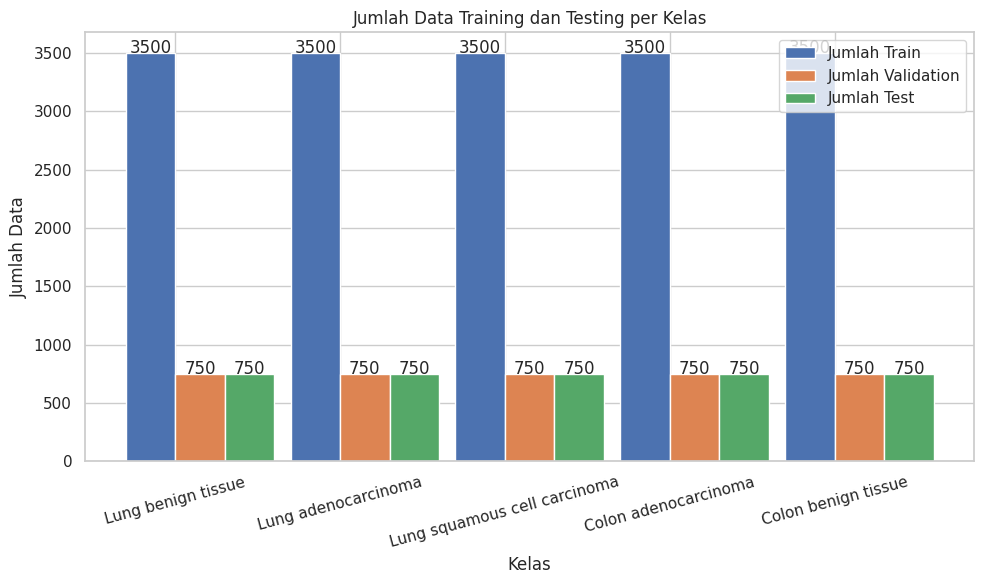

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

width = 0.3  # Lebar batang

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot untuk Jumlah_train
train_bar = np.arange(len(label))
train_plot = plt.bar(train_bar, Jumlah_train, width, label='Jumlah Train')

# Plot untuk Jumlah_test
val_bar = train_bar + width
val_plot = plt.bar(val_bar, Jumlah_val, width, label='Jumlah Validation')

# Plot untuk Jumlah_test
test_bar = val_bar + width
test_plot = plt.bar(test_bar, Jumlah_test, width, label='Jumlah Test')

# Menambahkan label pada sumbu x dan sumbu y
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

# Menambahkan label pada setiap batang
for i in range(len(label)):
    plt.text(train_bar[i], Jumlah_train[i], str(Jumlah_train[i]), ha='center')
    plt.text(val_bar[i], Jumlah_val[i], str(Jumlah_val[i]), ha='center')
    plt.text(test_bar[i], Jumlah_test[i], str(Jumlah_test[i]), ha='center')

# Menambahkan judul dan legend
plt.title('Jumlah Data Training dan Testing per Kelas')
plt.legend()

# Menandai posisi kelas pada sumbu x
plt.xticks(train_bar + width/2, label)
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Perbandingan training data, validation data, dan test data : 70% 30% 30%

### Augmentasi Data

In [22]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/lung_colon_split/train_data"
test_dir = "/content/lung_colon_split/test_data"
validation_dir = "/content/lung_colon_split/validation_data"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Training images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

print("Testing images:")
validation_data = validation_datagen.flow_from_directory(validation_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 17500 images belonging to 5 classes.
Training images:
Found 3750 images belonging to 5 classes.
Testing images:
Found 3750 images belonging to 5 classes.


## Modelling

### Model 0

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))

x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(16, 3, activation='relu')(x)
x = MaxPool2D()(x)

x = Conv2D(32, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D()(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)

model_0 = Model(inputs=inputs, outputs=outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data)
                        )

Epoch 1/5
547/547 [==============================] - 224s 387ms/step - loss: 1.1922 - accuracy: 0.6694 - val_loss: 0.5370 - val_accuracy: 0.7299
Epoch 2/5
547/547 [==============================] - 211s 386ms/step - loss: 0.4549 - accuracy: 0.7986 - val_loss: 0.4843 - val_accuracy: 0.7928
Epoch 3/5
547/547 [==============================] - 211s 385ms/step - loss: 0.3374 - accuracy: 0.8647 - val_loss: 0.4574 - val_accuracy: 0.8173
Epoch 4/5
547/547 [==============================] - 211s 386ms/step - loss: 0.2152 - accuracy: 0.9218 - val_loss: 0.4822 - val_accuracy: 0.8120
Epoch 5/5
547/547 [==============================] - 221s 404ms/step - loss: 0.1316 - accuracy: 0.9541 - val_loss: 0.5322 - val_accuracy: 0.8131


In [24]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 387200)            0         
                                                                 
 dropout (Dropout)           (None, 387200)            0         
                                                             

In [25]:
baseModel_result = model_0.evaluate(test_data)

118/118 [==============================] - 35s 298ms/step - loss: 0.4914 - accuracy: 0.8253


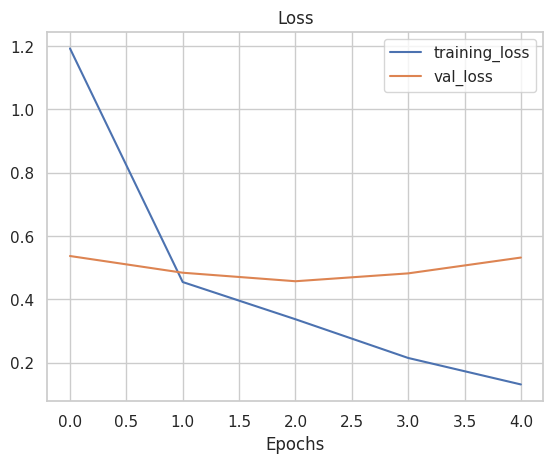

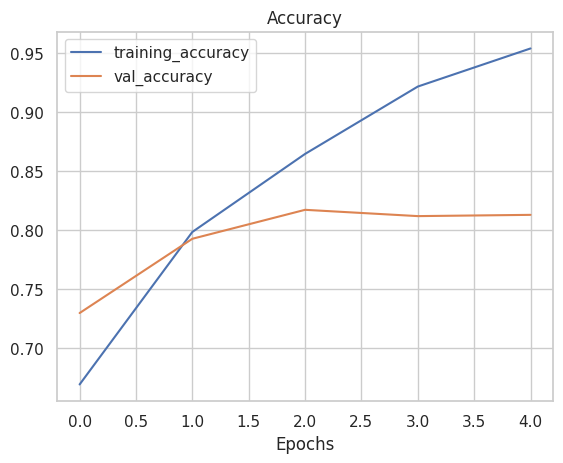

In [26]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_0)

### Model 1 (Transfer Learning)

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [28]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model


In [29]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

#### Resnet

In [30]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [31]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/5
547/547 [==============================] - 232s 425ms/step - loss: 0.1111 - accuracy: 0.9633 - val_loss: 0.1045 - val_accuracy: 0.9656
Epoch 2/5
547/547 [==============================] - 214s 391ms/step - loss: 0.0708 - accuracy: 0.9766 - val_loss: 0.0690 - val_accuracy: 0.9765
Epoch 3/5
547/547 [==============================] - 214s 392ms/step - loss: 0.0554 - accuracy: 0.9819 - val_loss: 0.0643 - val_accuracy: 0.9779
Epoch 4/5
547/547 [==============================] - 214s 392ms/step - loss: 0.0462 - accuracy: 0.9842 - val_loss: 0.0509 - val_accuracy: 0.9808
Epoch 5/5
547/547 [==============================] - 214s 392ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0537 - val_accuracy: 0.9797


In [35]:
resnet_result = resnet_model.evaluate(test_data)

118/118 [==============================] - 38s 324ms/step - loss: 0.0524 - accuracy: 0.9821


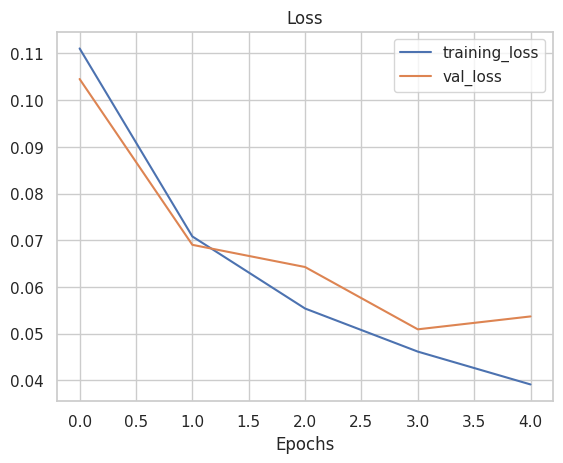

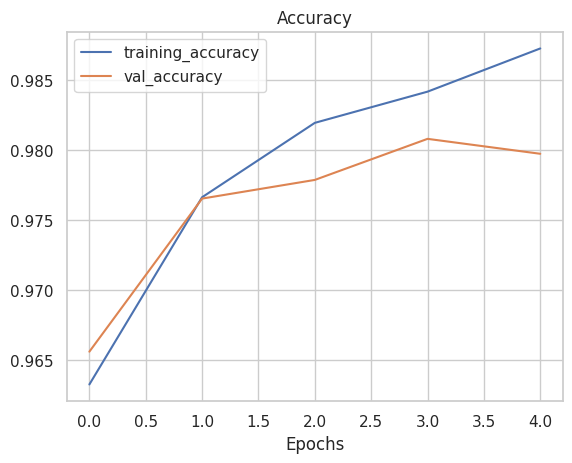

In [36]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(resnet_history)

#### efficientnet

In [37]:
# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [38]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4,055,969
Trainable params: 6,405
Non-trainable params: 4,049,564
_________________________________________________________________


In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/5
547/547 [==============================] - 224s 392ms/step - loss: 0.1930 - accuracy: 0.9451 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 2/5
547/547 [==============================] - 211s 387ms/step - loss: 0.0681 - accuracy: 0.9798 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 3/5
547/547 [==============================] - 211s 386ms/step - loss: 0.0485 - accuracy: 0.9869 - val_loss: 0.0456 - val_accuracy: 0.9851
Epoch 4/5
547/547 [==============================] - 212s 387ms/step - loss: 0.0382 - accuracy: 0.9893 - val_loss: 0.0387 - val_accuracy: 0.9867
Epoch 5/5
547/547 [==============================] - 211s 385ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.0352 - val_accuracy: 0.9893


In [40]:
efficientnet_result = efficientnet_model.evaluate(test_data)

118/118 [==============================] - 38s 317ms/step - loss: 0.0339 - accuracy: 0.9907


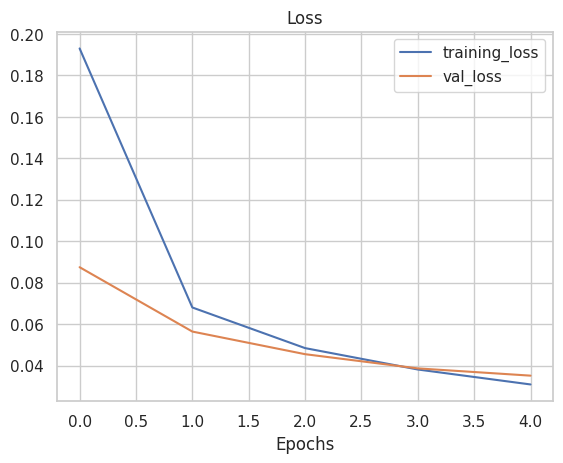

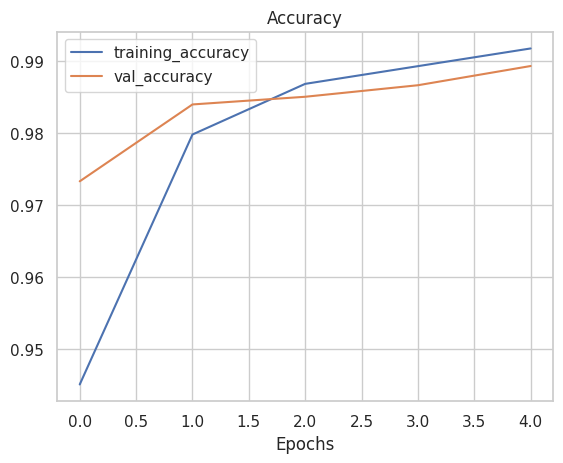

In [41]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(efficientnet_history)

## Evaluation

In [42]:
print(f"Akurasi Base Model = {baseModel_result[1]}")
print(f"Akurasi Resnet = {round(resnet_result[1],2)}")
print(f"Akurasi Efficientnet ={round(efficientnet_result[1],2)}")

Akurasi Base Model = 0.8253333568572998
Akurasi Resnet = 0.98
Akurasi Efficientnet =0.99


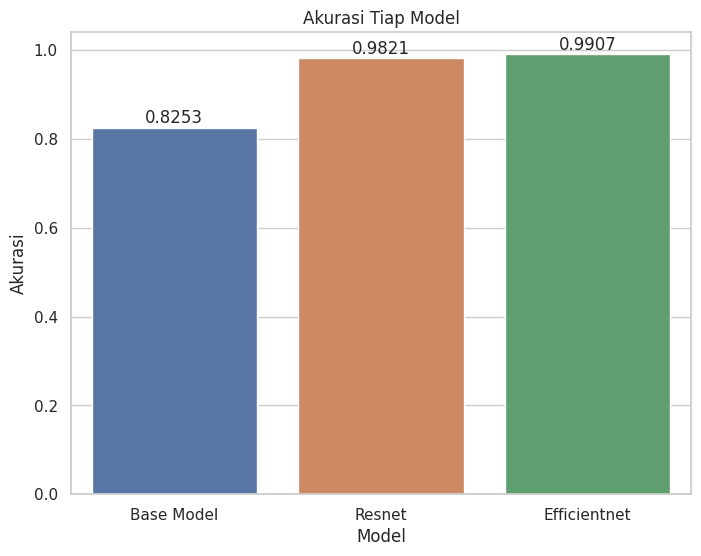

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

akurasi = [round(baseModel_result[1],4), round(resnet_result[1],4), round(efficientnet_result[1],4)]
model = ["Base Model", "Resnet", "Efficientnet"]

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=model, y=akurasi)
plt.title('Akurasi Tiap Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')

# Menambahkan keterangan nilai akurasi pada setiap batang
for i in range(len(akurasi)):
    plt.text(i, akurasi[i] + 0.01, str(akurasi[i]), ha='center')

plt.show()

Efficientnet Memiliki Akurasi Tertinggi dibandingkan ketiga model

## Test Predict New Image

In [44]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/lung_colon_split/train_data") # turn our training path into a Python path
# class_names = np.array([item.name for item in data_dir.glob('*')]) # created a list of class_names from the subdirectories
class_names = np.array([item.name for item in sorted(data_dir.glob('*'))]) # created a list of class_names from the subdirectories
class_names

array(['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc'],
      dtype='<U9')

1/1 [==============================] - 0s 66ms/step


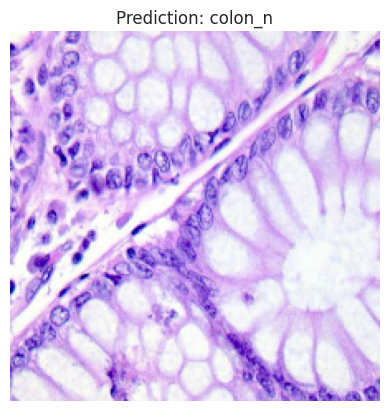

In [47]:
pred_and_plot(model=resnet_model,
              filename="/content/lung_colon_split/test_data/colon_n/colonn1007.jpeg",
              class_names=class_names)

Model dapat memprediksi dengan benar menggunakan gambar baru